<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Optimize_Tensorflow_Pipeline_Performance_prefetch_%26_cache_%7C_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import time

In [16]:
tf.__version__

'2.7.0'

# ***When there is no Prefetch***

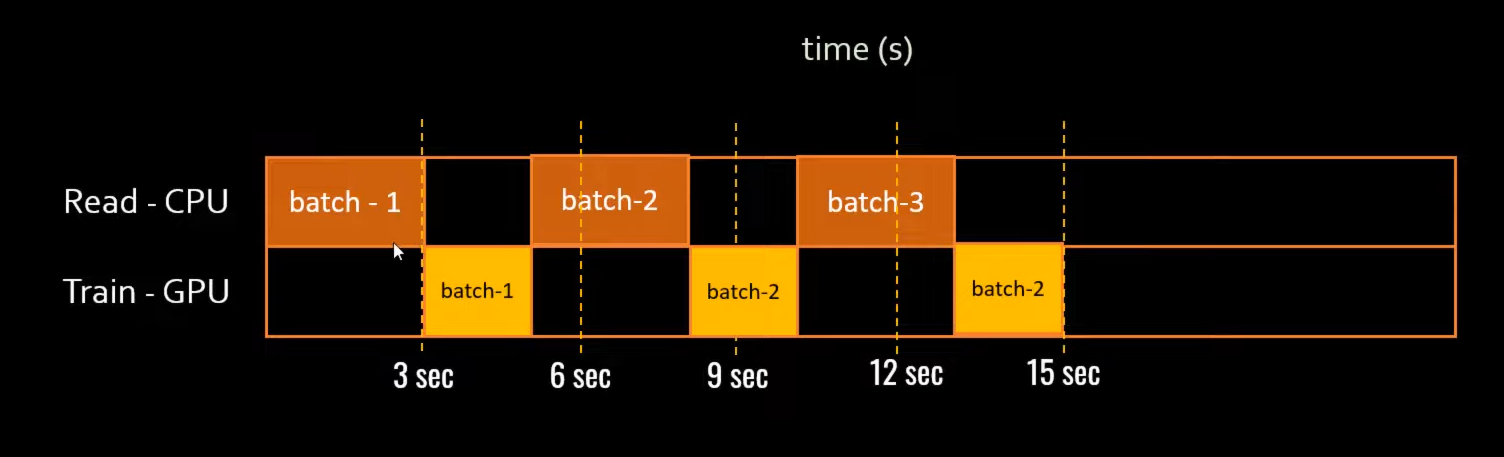

# ***When there is prefetch***

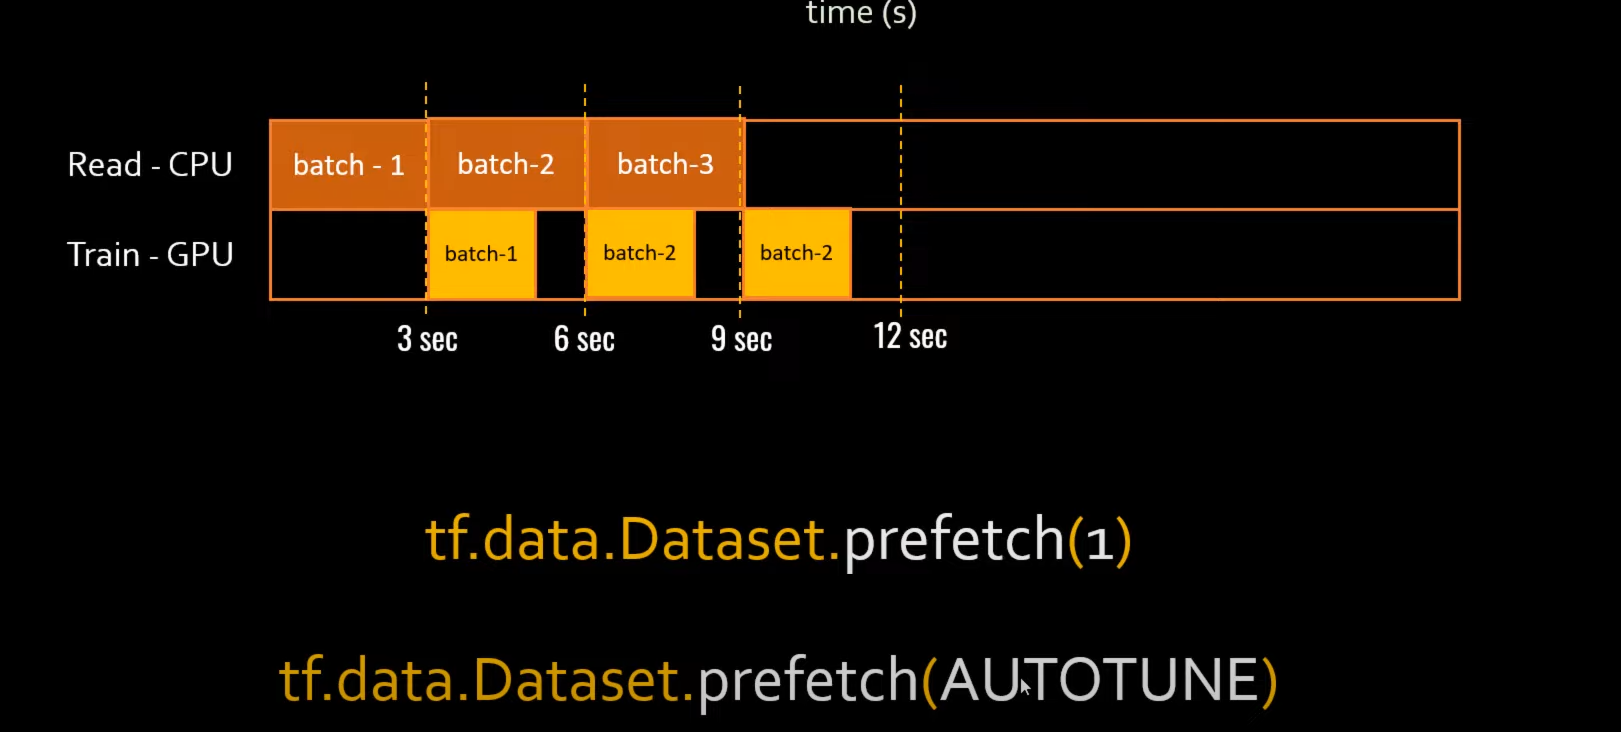

# ***When there is no caching***

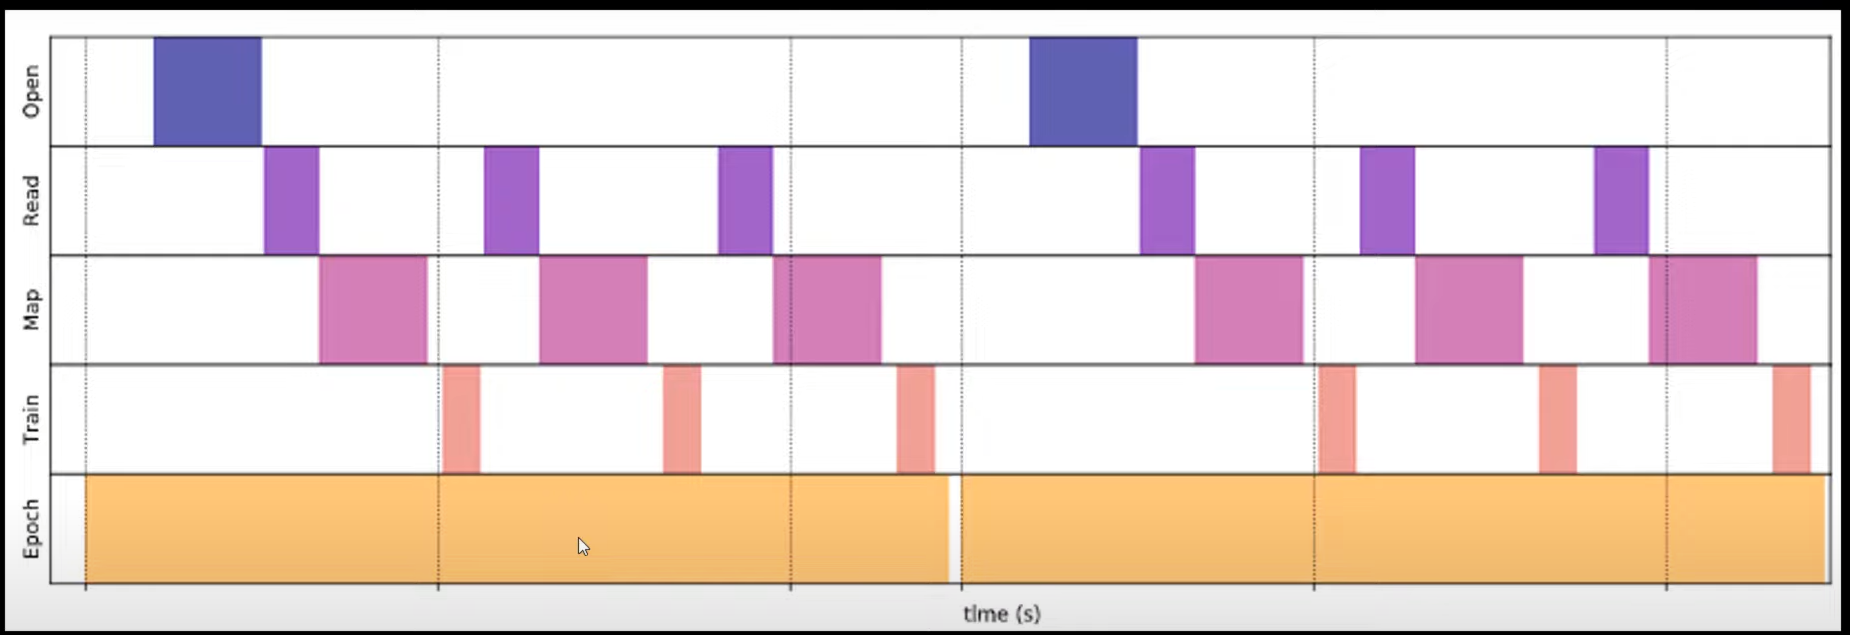

# ***When there is caching done***

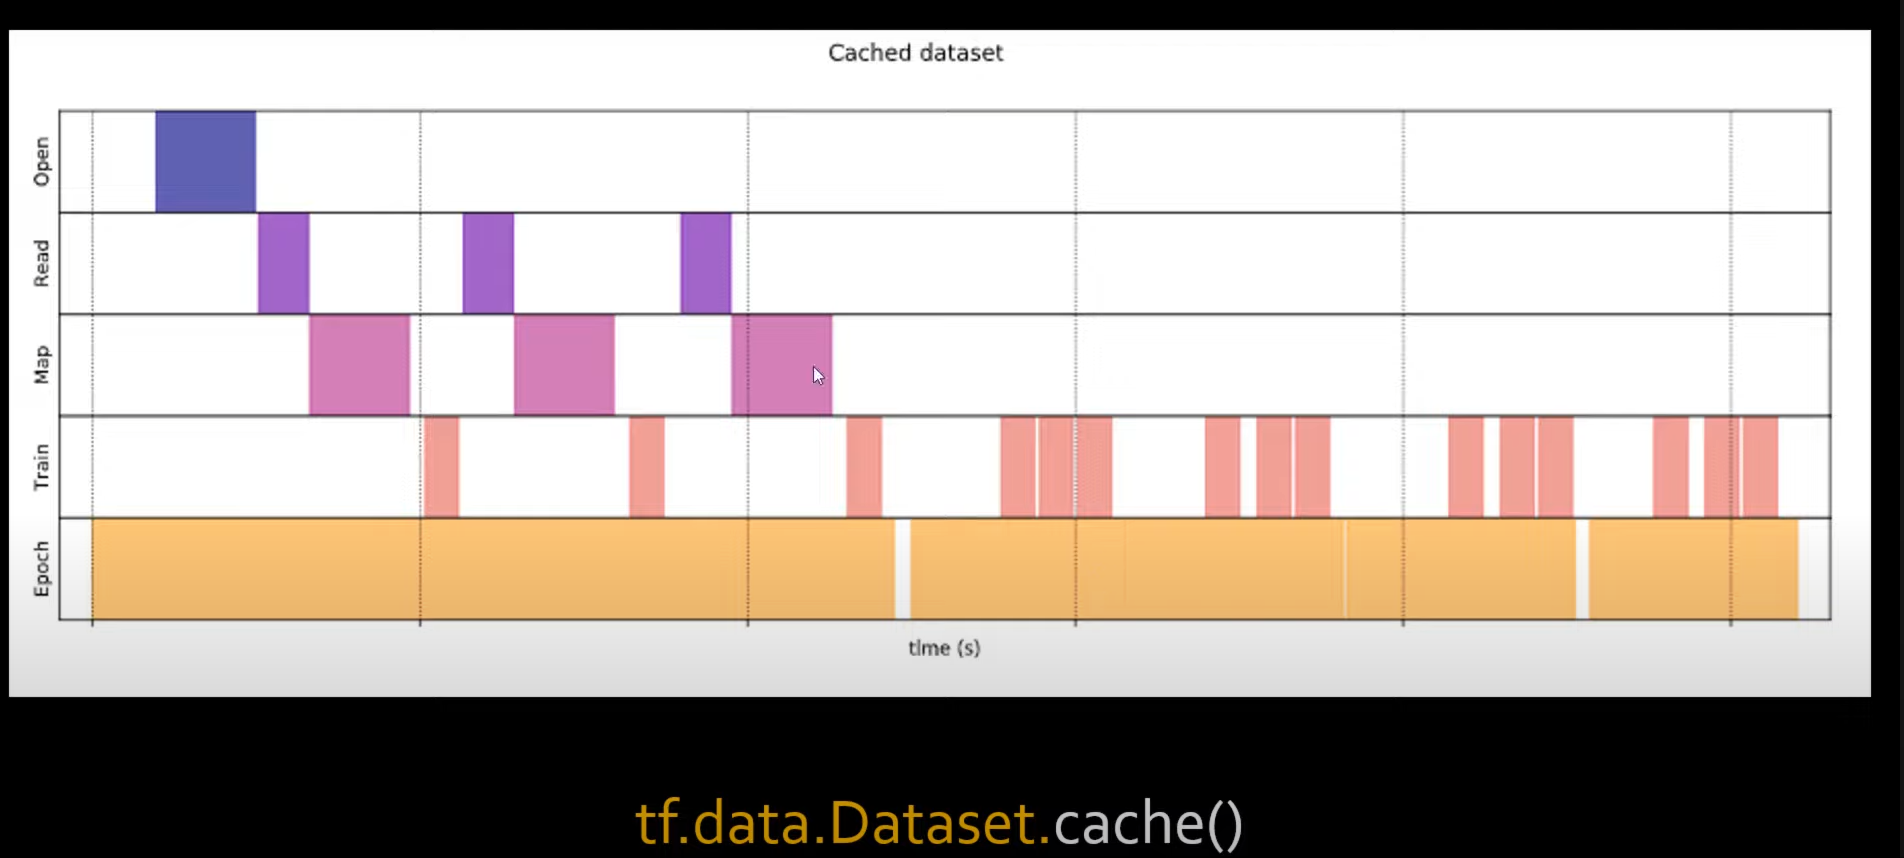

In [17]:
# Mimicing the delay that happens in reading each line or file or image by artiifically creating the dummy class

class ArtificialDataset(tf.data.Dataset):
  
    def _generator(num_samples):
        # Opening the file
        time.sleep(0.03)

        for sample_idx in range(num_samples):
            # Reading data (line, record) from the file
            time.sleep(0.015)

            yield (sample_idx,)

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )

In [19]:
def benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    for epoch_num in range(num_epochs):
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)
    print("Execution time:", time.perf_counter() - start_time)

In [20]:
benchmark(ArtificialDataset())

Execution time: 0.2616866440000649


In [21]:
benchmark(ArtificialDataset().prefetch(tf.data.AUTOTUNE))

Execution time: 0.22505477599997903


#*** Doing Caching here***

In [30]:
%%timeit -n1 -r1
dataset = tf.data.Dataset.range(5).map(lambda x: x**2)


for d in dataset:
  print(d.numpy())

Cause: could not parse the source code of <function inner.<locals>.<lambda> at 0x7f2e7d1fc0e0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function inner.<locals>.<lambda> at 0x7f2e7d1fc0e0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0
1
4
9
16
1 loop, best of 1: 39.3 ms per loop


In [31]:
%%timeit -n1 -r1
dataset = tf.data.Dataset.range(5).map(lambda x: x**2).cache()

# see the difference in the time saved around 9 milisecond
for d in dataset:
  print(d.numpy())

Cause: could not parse the source code of <function inner.<locals>.<lambda> at 0x7f2f25d32560>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function inner.<locals>.<lambda> at 0x7f2f25d32560>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0
1
4
9
16
1 loop, best of 1: 30.5 ms per loop
